### Importing Necessary Libraries

In [1]:
#!pip install --upgrade seaborn
#!pip install keras
#!pip install tensorflow

In [2]:
# This cell imports the necessary libraries for data manipulation, preprocessing, and building the LSTM model.
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection and Preprocessing

In [3]:
# This cell defines the stock symbols and company names, sets the date range for data collection,
# fetches historical stock data from Yahoo Finance, and processes it by setting the Date column as the index.

stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]
startDate = int(datetime.datetime(2016, 1, 1).timestamp())
current_date = datetime.datetime.now()

# Use the current date to set the endDate
endDate = int(current_date.timestamp())
interval = '1d'
stock_data = {}

for stock in stocks:
    url = f'https://query1.finance.yahoo.com/v7/finance/download/{stock}?period1={startDate}&period2={endDate}&interval={interval}&events=history&includeAdjustedClose=true'
    df = pd.read_csv(url)
    df['Date'] = pd.to_datetime(df['Date'])  # Ensure the Date column is in datetime format
    df.set_index('Date', inplace=True)  # Set the Date column as the index
    stock_data[stock] = df


### Visualizing Historical Closing Prices

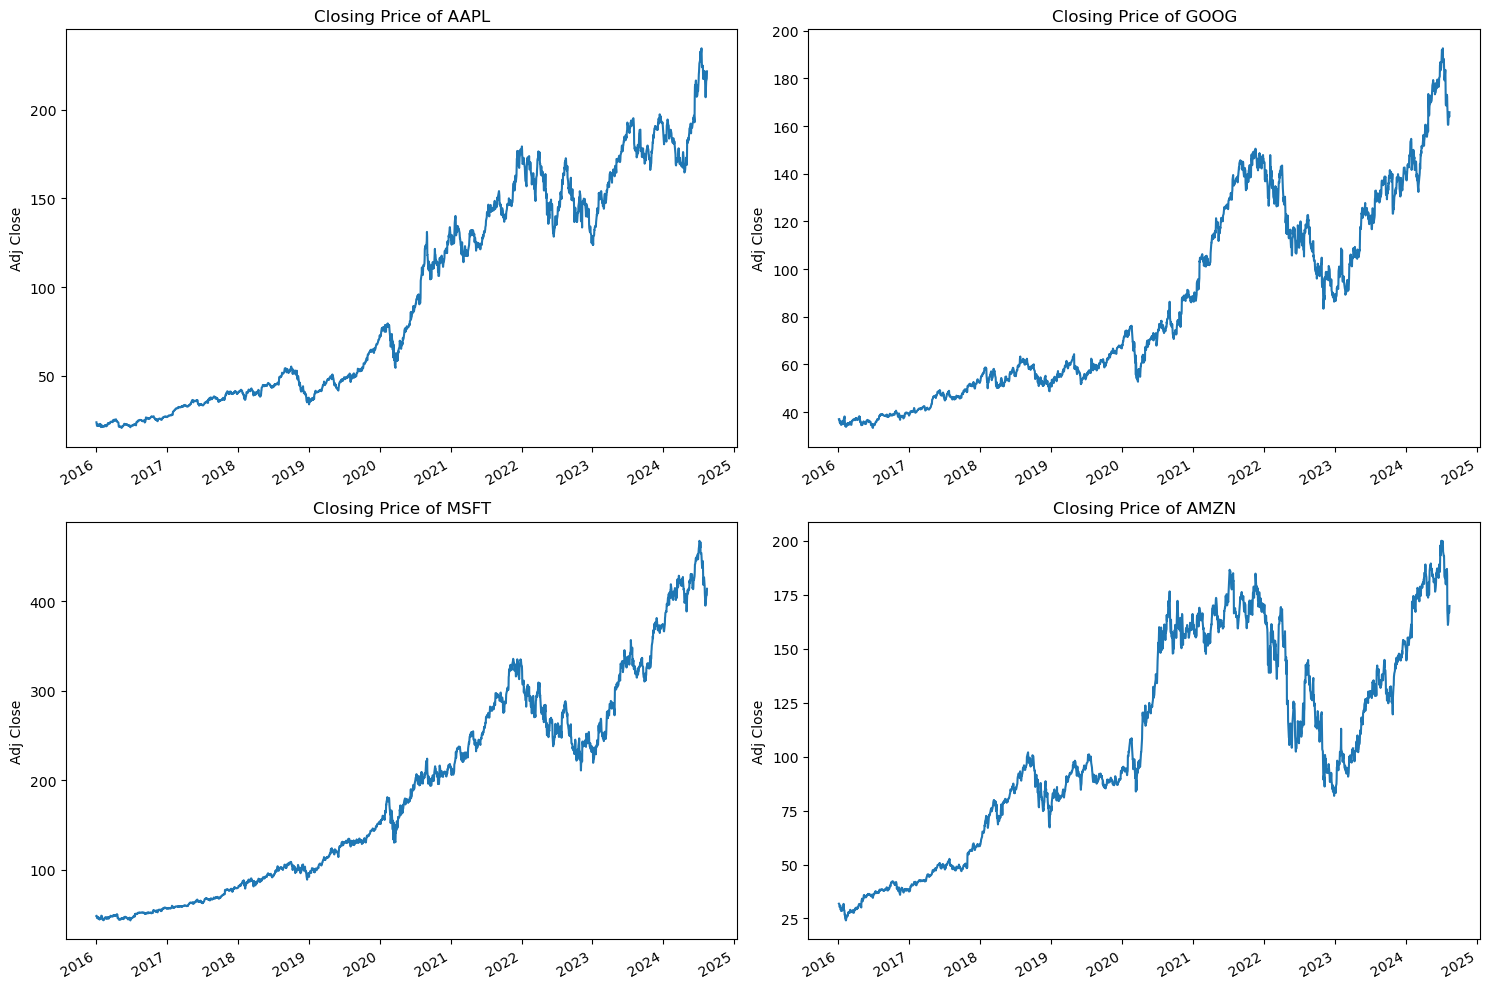

In [4]:
# This cell plots the historical adjusted closing prices for each stock to provide a visual overview of their performance over time.

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(stocks, 1):
    plt.subplot(2, 2, i)
    stock_data[company]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stocks[i - 1]}")
    
plt.tight_layout()


### Visualizing Daily Trading Volume

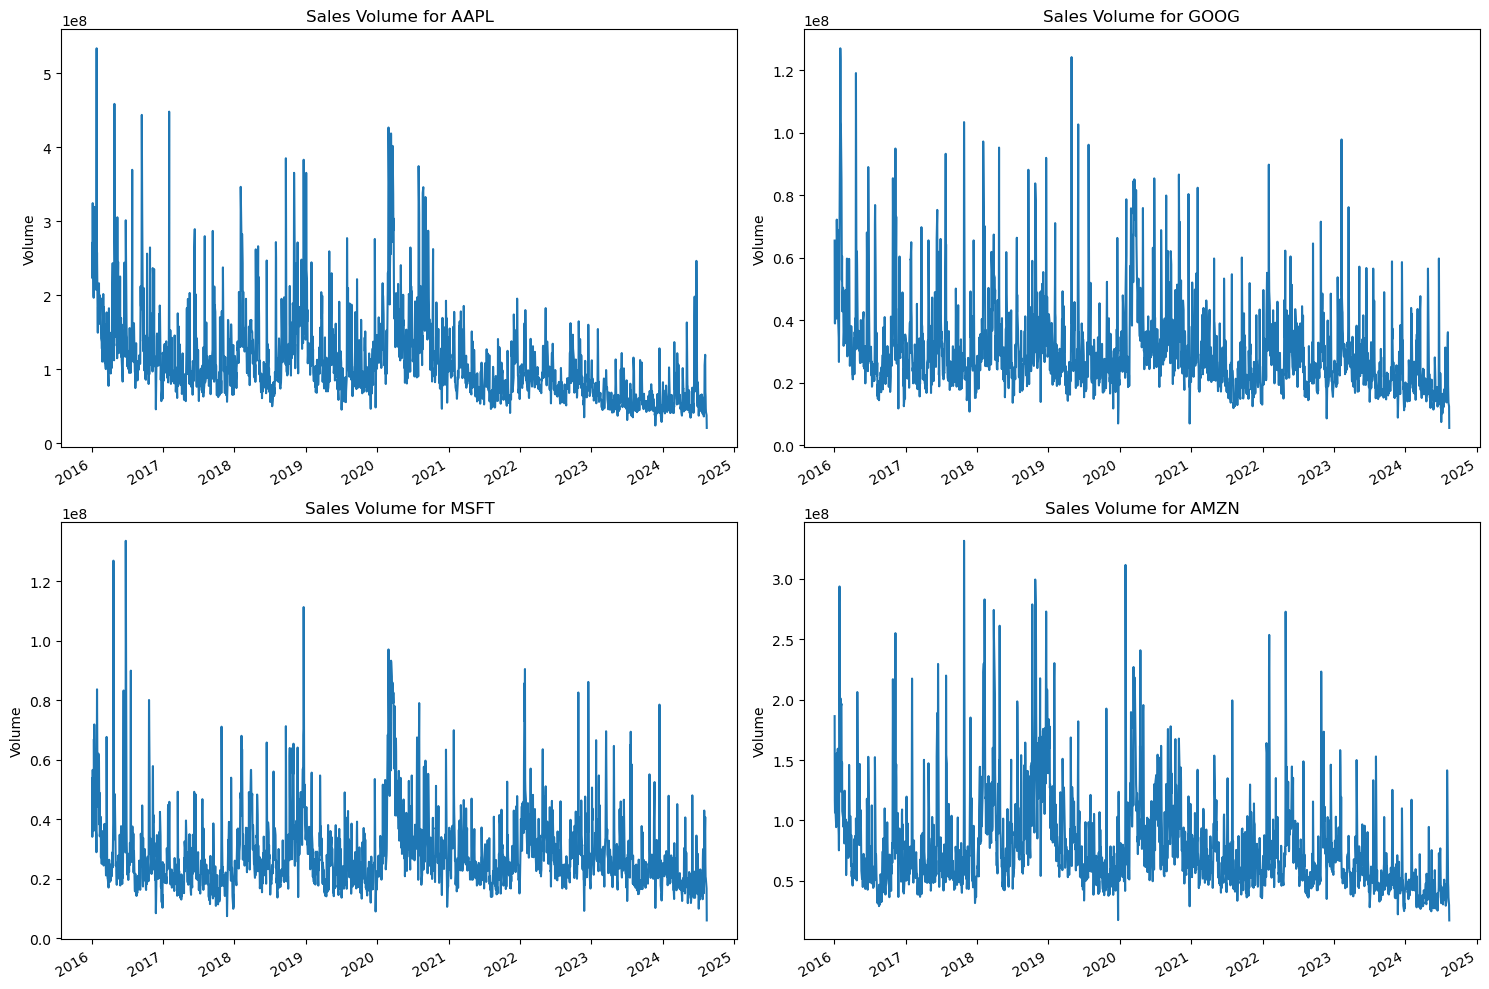

In [5]:
# This cell plots the daily trading volume for each stock to provide insights into the trading activity over time.

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(stocks, 1):
    plt.subplot(2, 2, i)
    stock_data[company]['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stocks[i - 1]}")
    
plt.tight_layout()


### Calculating and Visualizing Moving Averages

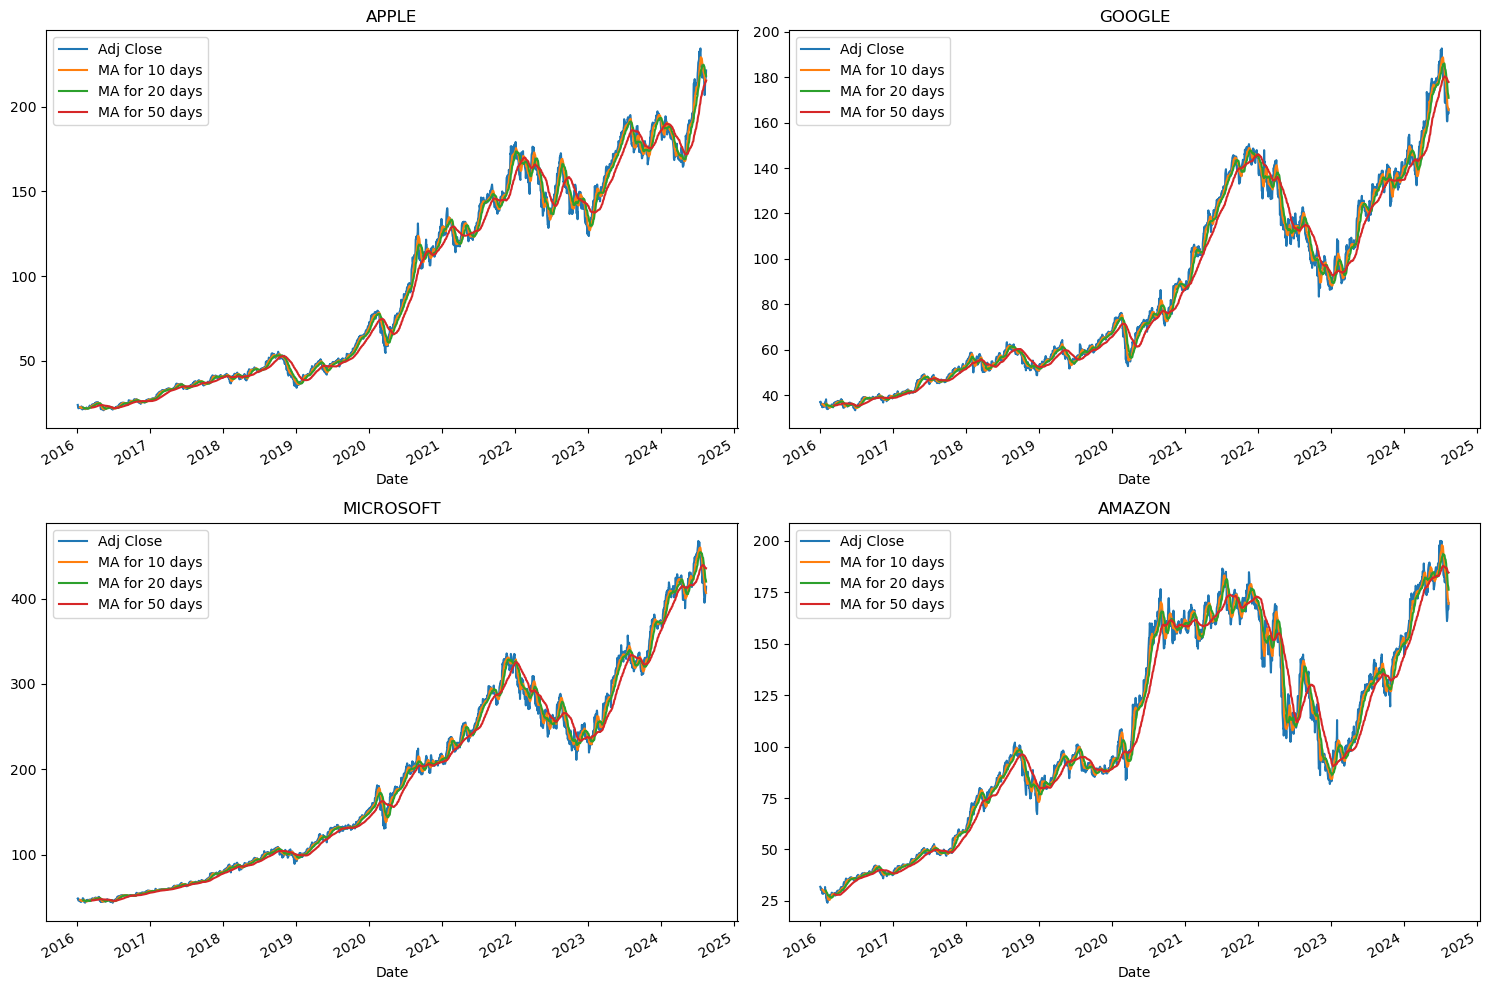

In [6]:
# This cell calculates the moving averages (MA) for 10, 20, and 50 days for each stock and plots them alongside the adjusted closing prices.

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in stocks:
        column_name = f"MA for {ma} days"
        stock_data[company][column_name] = stock_data[company]['Adj Close'].rolling(ma).mean()
        
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

stock_data['AAPL'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

stock_data['GOOG'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

stock_data['MSFT'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

stock_data['AMZN'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


### Calculating and Visualizing Daily Return Percentage

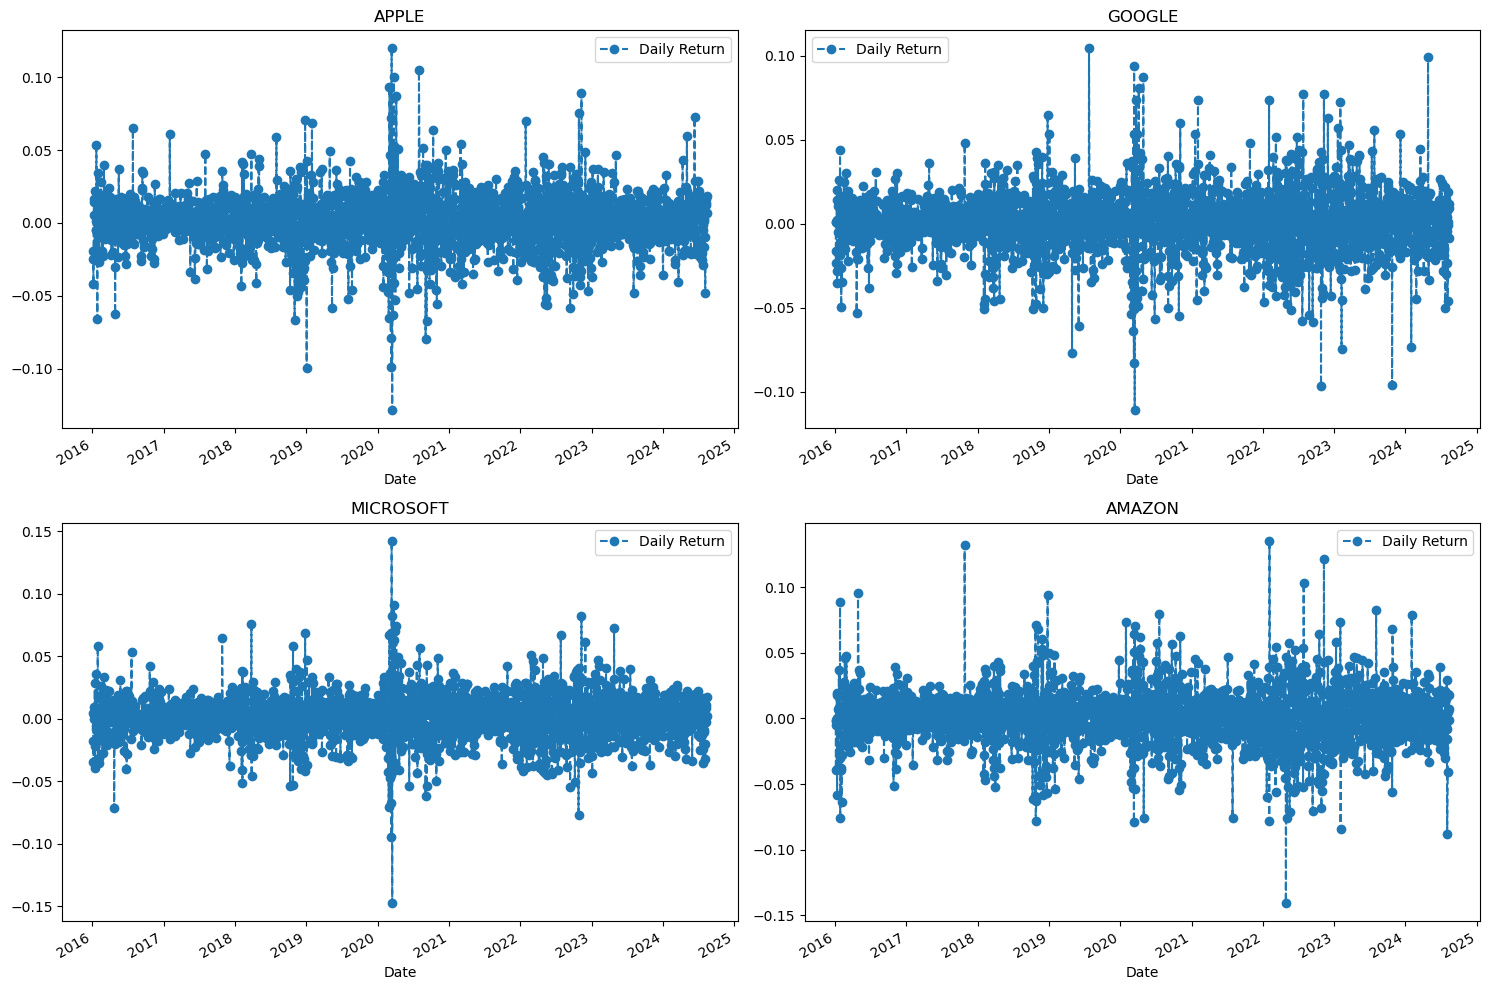

In [7]:
# This cell calculates the daily return percentage for each stock using the percentage change method and plots these daily returns to analyze the volatility and performance.

# Calculate daily return percentage
for company in stocks:
    stock_data[company]['Daily Return'] = stock_data[company]['Adj Close'].pct_change()

# Plot daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

stock_data['AAPL']['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

stock_data['GOOG']['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

stock_data['MSFT']['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

stock_data['AMZN']['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


### Plotting Histograms of Daily Returns

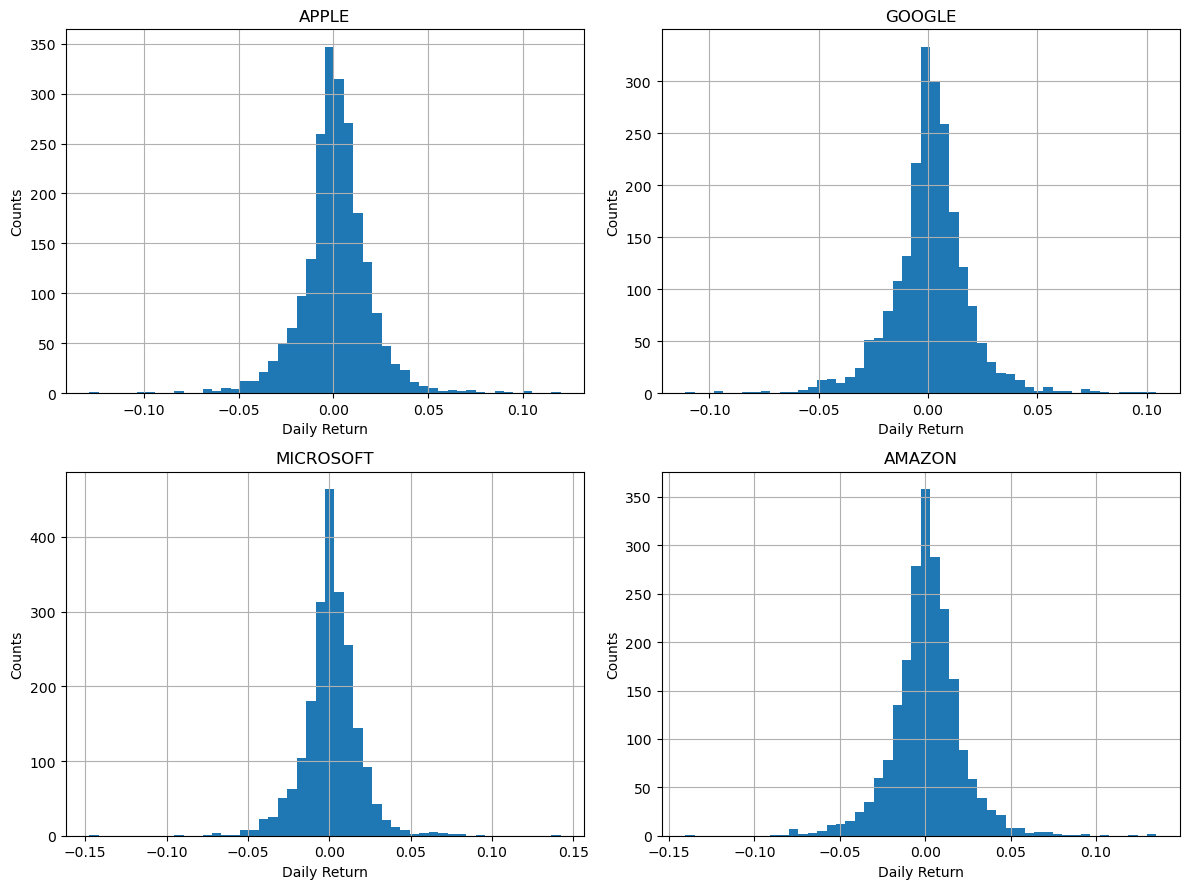

In [8]:
# This cell creates histograms for the daily return percentages of each stock to visualize the distribution and frequency of returns.

plt.figure(figsize=(12, 9))

for i, company in enumerate(stocks, 1):
    plt.subplot(2, 2, i)
    stock_data[company]['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()


### Creating and Analyzing Combined Closing Prices DataFrame

In [9]:
# This cell creates a DataFrame to hold the adjusted closing prices of all stocks and calculates the percentage change for these closing prices to analyze daily returns.

# Create a DataFrame to hold the closing prices of all stocks
closing_prices = pd.DataFrame()

# Extract the 'Adj Close' prices and combine into one DataFrame
for stock in stocks:
    closing_prices[stock] = stock_data[stock]['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_prices.pct_change()
tech_rets.head()


,AAPL,GOOG,MSFT,AMZN
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.025060,0.000998,0.004562,-0.005024
2016-01-06,-0.019570,0.001400,-0.018165,-0.001799
2016-01-07,-0.042204,-0.023170,-0.034783,-0.039058
2016-01-08,0.005287,-0.016410,0.003067,-0.001464


### Visualizing AAPL Returns with a Scatter Plot

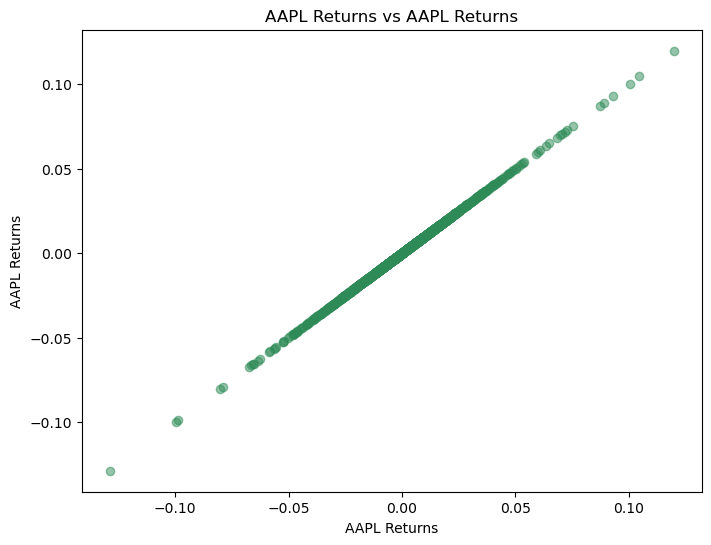

In [10]:
# This cell creates a scatter plot of AAPL's daily returns against itself, which should show a perfectly linear relationship as a validation of the data.
plt.figure(figsize=(8, 6))
plt.scatter(tech_rets['AAPL'], tech_rets['AAPL'], color='seagreen', alpha=0.5)
plt.xlabel('AAPL Returns')
plt.ylabel('AAPL Returns')
plt.title('AAPL Returns vs AAPL Returns')
plt.show()

### Comparing Returns of AAPL and MSFT

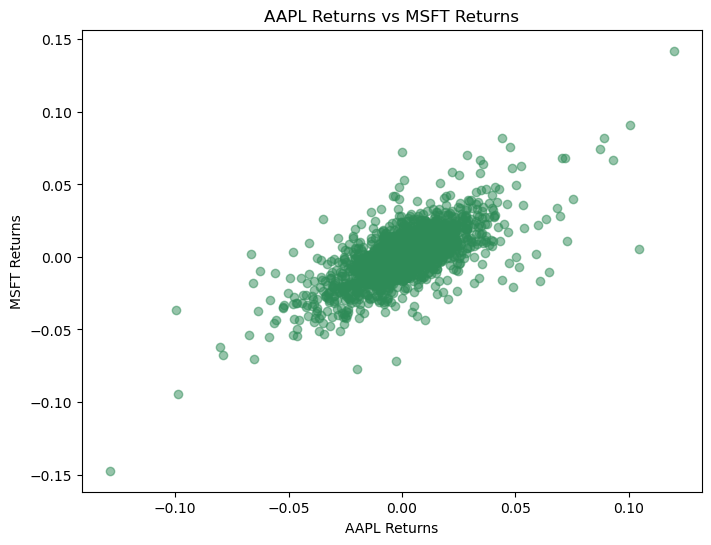

In [11]:
# This cell creates a scatter plot comparing the daily returns of AAPL and MSFT. It helps visualize the relationship between the returns of these two stocks.
plt.figure(figsize=(8, 6))
plt.scatter(tech_rets['AAPL'], tech_rets['MSFT'], color='seagreen', alpha=0.5)
plt.xlabel('AAPL Returns')
plt.ylabel('MSFT Returns')
plt.title('AAPL Returns vs MSFT Returns')
plt.show()


### Automatic Visual Analysis with Pairplot

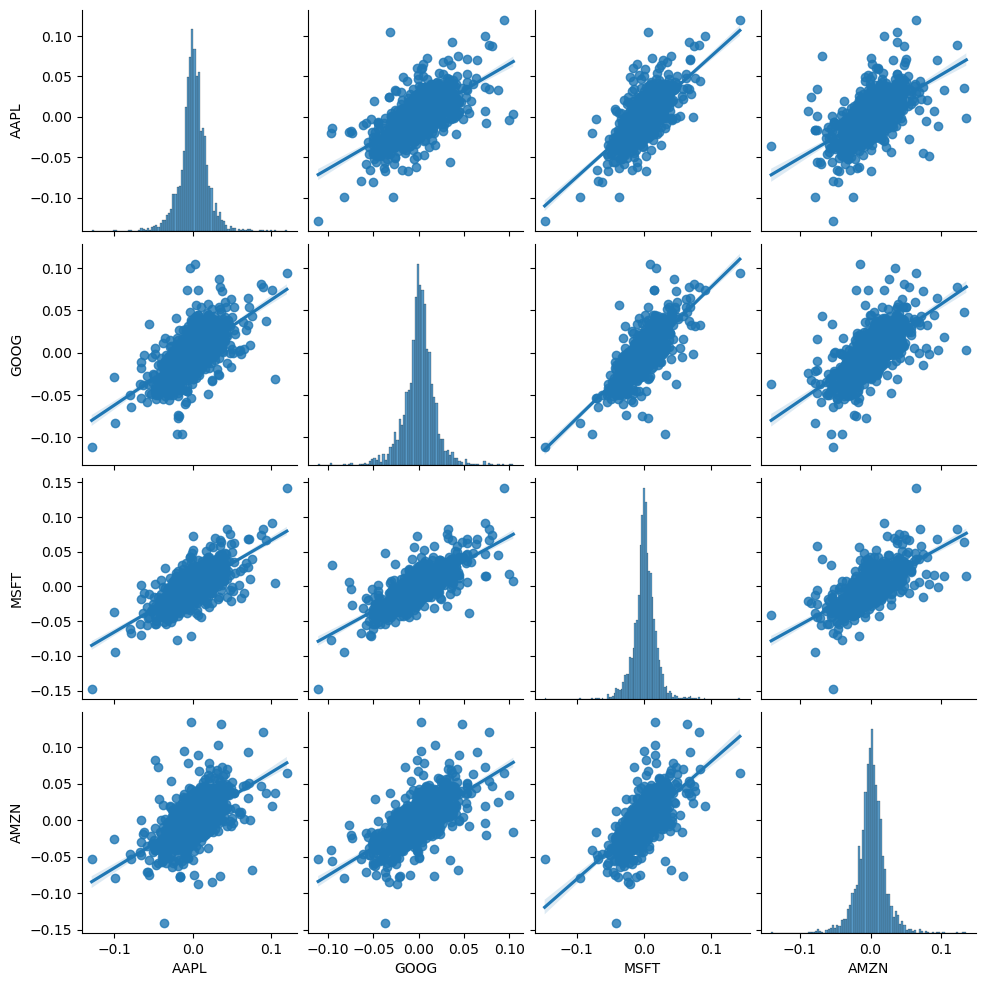

In [12]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets, kind='reg')

### Customized PairGrid for Stock Returns

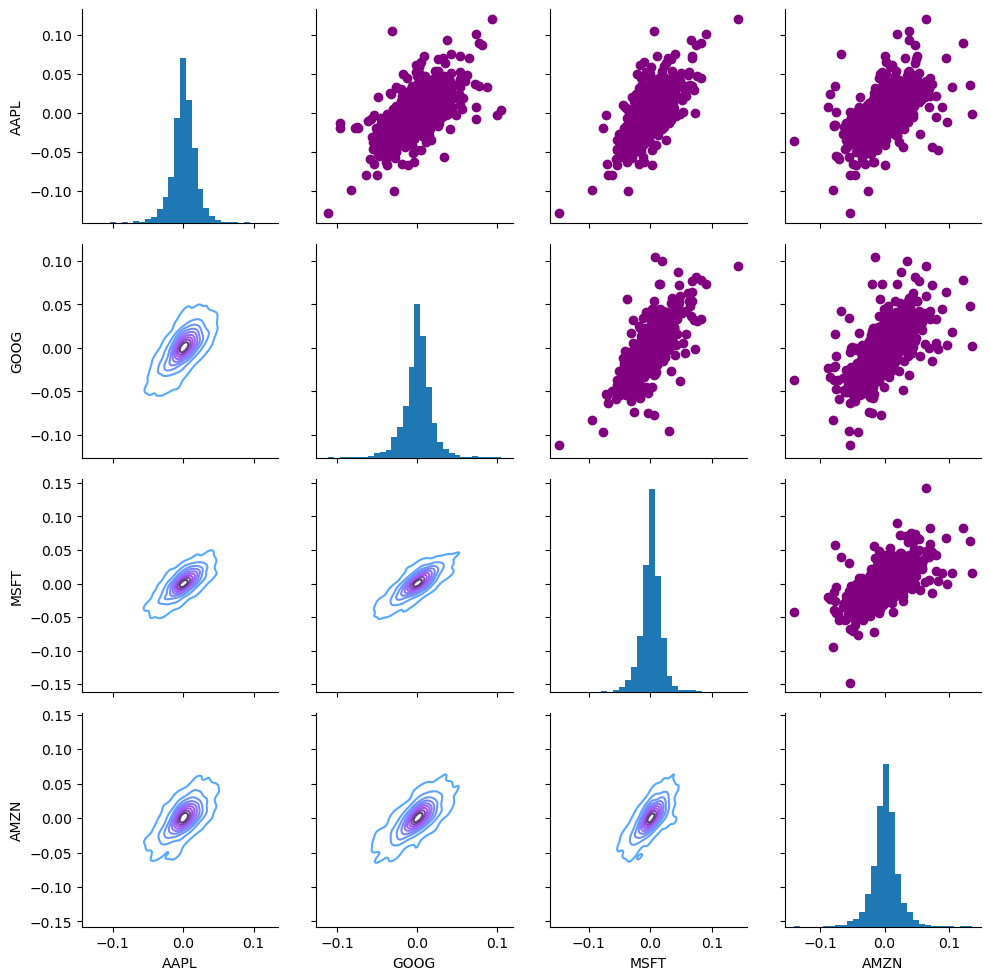

In [13]:
# This code sets up a `PairGrid` to visualize stock returns with scatter plots in the upper triangle, 
# KDE plots in the lower triangle, and histograms on the diagonal.

return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

### Customized PairGrid for Closing Prices

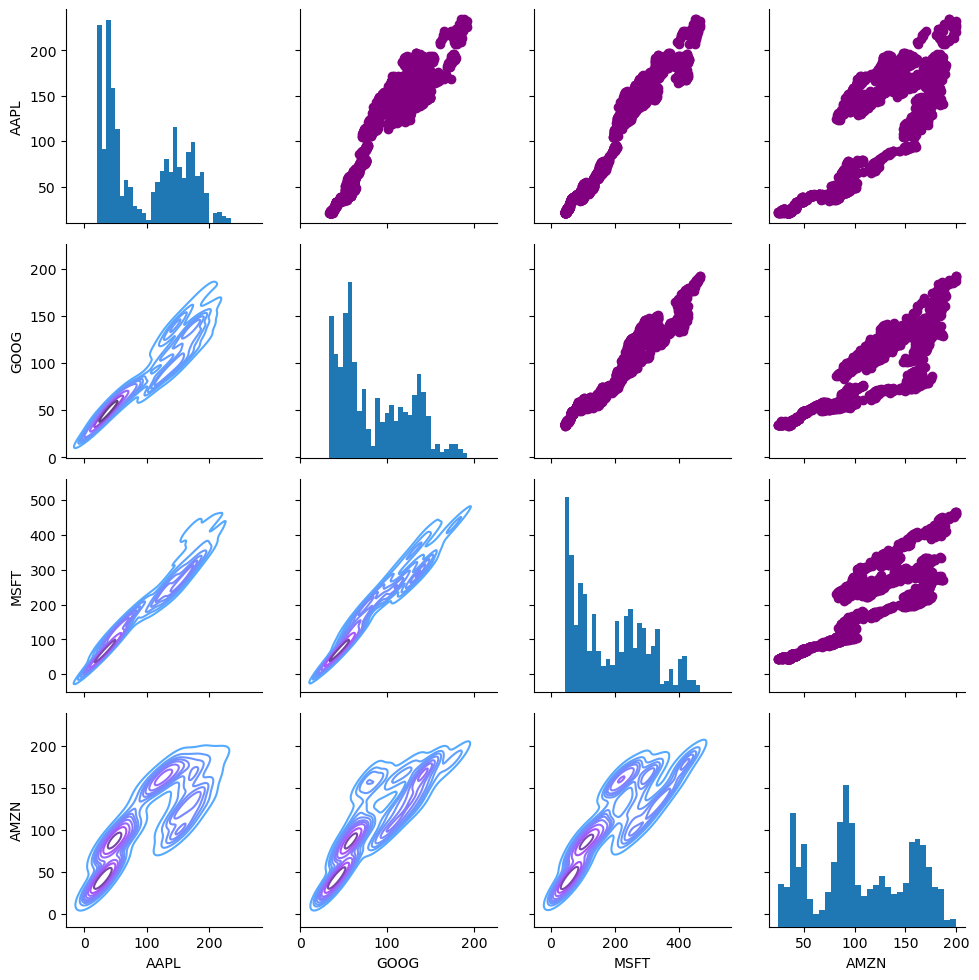

In [14]:
# This code creates a `PairGrid` to visualize relationships between closing prices. 
# It includes scatter plots in the upper triangle, KDE plots in the lower triangle, and histograms on the diagonal.

returns_fig = sns.PairGrid(closing_prices)

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)


### Heatmaps of Correlations

Text(0.5, 1.0, 'Correlation of Stock Closing Prices')

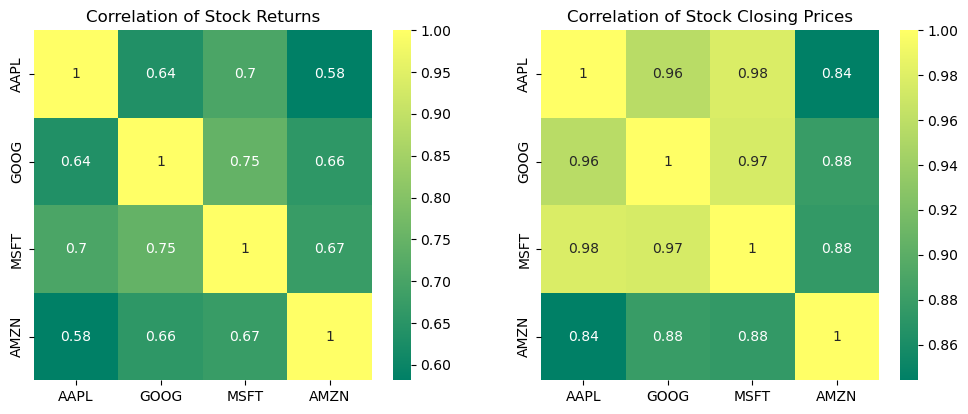

In [15]:
# This code generates heatmaps to visualize the correlation matrices. The first heatmap shows the correlation of stock returns, 
# and the second heatmap shows the correlation of stock closing prices.

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of Stock Returns')

plt.subplot(2, 2, 2)
sns.heatmap(closing_prices.corr(), annot=True, cmap='summer')
plt.title('Correlation of Stock Closing Prices')


### Scatter Plot of Return vs. Risk

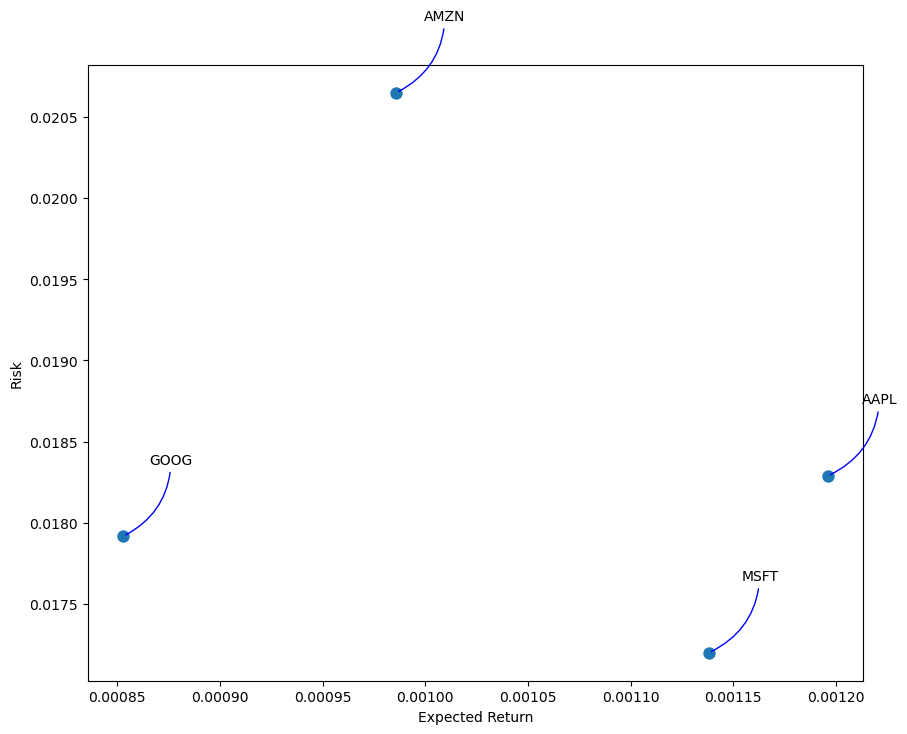

In [16]:
# This code creates a scatter plot showing the relationship between the average returns and the risk (standard deviation) of different stocks. 
# Each point represents a stock, with annotations indicating the stock names.

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


### Select DataFrame for AAPL Stock

In [17]:
# This code selects the DataFrame containing historical data for AAPL (Apple Inc.) from the `stock_data` dictionary.

df = stock_data['AAPL']

### Plotting AAPL Close Price History

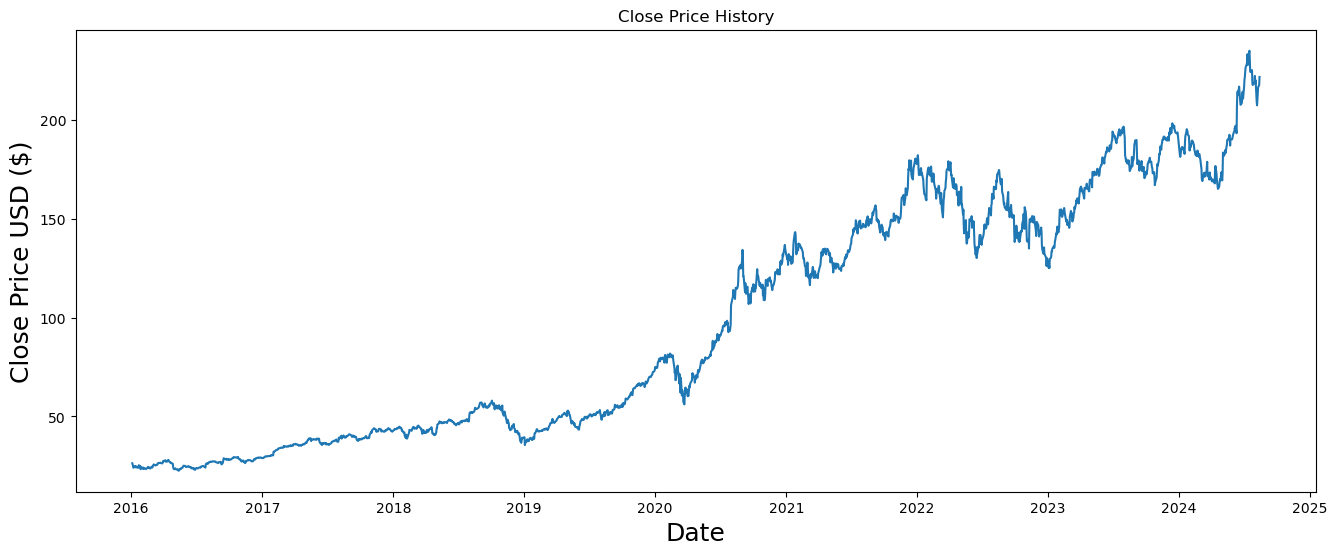

In [18]:
# This code plots the historical closing price of AAPL stock over time. 
# The x-axis represents the date, and the y-axis represents the closing price in USD.

plt.figure(figsize=(16, 6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


### Preparing Data for LSTM Model

In [19]:
# This code extracts the 'Close' column from the DataFrame, converts it to a NumPy array, 
# and calculates the length of the training dataset, which is 90% of the total dataset.

# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .9))

training_data_len


1951

### Scaling the Data

In [20]:
# This code scales the 'Close' price data to a range between 0 and 1 using MinMaxScaler, 
# which is useful for normalizing data before feeding it into a machine learning model.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01768088],
       [0.01457112],
       [0.01220345],
       ...,
       [0.91245553],
       [0.91853367],
       [0.93752205]])

### Preparing Training Data for LSTM

In [21]:
# This code creates the training dataset by splitting the scaled data into sequences of 60 days (x_train) 
# and their corresponding target values (y_train). The sequences are then reshaped to fit the LSTM model's requirements.

# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01768088, 0.01457112, 0.01220345, 0.00719721, 0.00779796,
       0.00964733, 0.01133178, 0.00830448, 0.01081348, 0.00799821,
       0.00744459, 0.00759771, 0.00702053, 0.01305157, 0.01071926,
       0.01136712, 0.00362806, 0.00441727, 0.00824558, 0.00717366,
       0.00487668, 0.00707942, 0.00737391, 0.00433482, 0.00550099,
       0.00547742, 0.0046293 , 0.00395788, 0.00429948, 0.00742102,
       0.00916438, 0.00697341, 0.00671426, 0.00770372, 0.00512405,
       0.00678494, 0.00756238, 0.00773907, 0.00747993, 0.01200321,
       0.01226235, 0.01314581, 0.0149245 , 0.01358165, 0.01259218,
       0.0126982 , 0.01275709, 0.01404105, 0.0143473 , 0.01677386,
       0.0184112 , 0.01821095, 0.0183523 , 0.01834053, 0.01929465,
       0.01859966, 0.01805782, 0.01749241, 0.02042548, 0.02264   ])]
[0.02196857174477078]

[array([0.01768088, 0.01457112, 0.01220345, 0.00719721, 0.00779796,
       0.00964733, 0.01133178, 0.00830448, 0.01081348, 0.00799821,
       0.00744459, 0.00759771, 0.00

### Building the LSTM Model

In [22]:
# Build the LSTM model
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


### Display Model Summary

In [23]:
# This code outputs a summary of the LSTM model architecture, including the layer types, output shapes, and the number of parameters.

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

### Compile and Train the LSTM Model

In [24]:
# This code compiles the LSTM model using the Adam optimizer and mean squared error loss function. 
# It then trains the model on the training data for 9 epochs with a batch size of 1.

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['MAE'])

# Train the model
history = model.fit(x_train, y_train, batch_size=1, epochs=9)


Epoch 1/9
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - MAE: 0.0297 - loss: 0.0030
Epoch 2/9
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - MAE: 0.0166 - loss: 5.5724e-04
Epoch 3/9
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - MAE: 0.0148 - loss: 4.0335e-04
Epoch 4/9
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - MAE: 0.0142 - loss: 3.7510e-04
Epoch 5/9
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - MAE: 0.0135 - loss: 3.4441e-04
Epoch 6/9
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - MAE: 0.0115 - loss: 2.3859e-04
Epoch 7/9
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - MAE: 0.0116 - loss: 2.5823e-04
Epoch 8/9
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - MAE: 0.0129 - loss: 3.1631e-04
Epoch 9/9
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - MAE: 0.0102 - loss: 1.8651e-04


## Plot the Training Loss

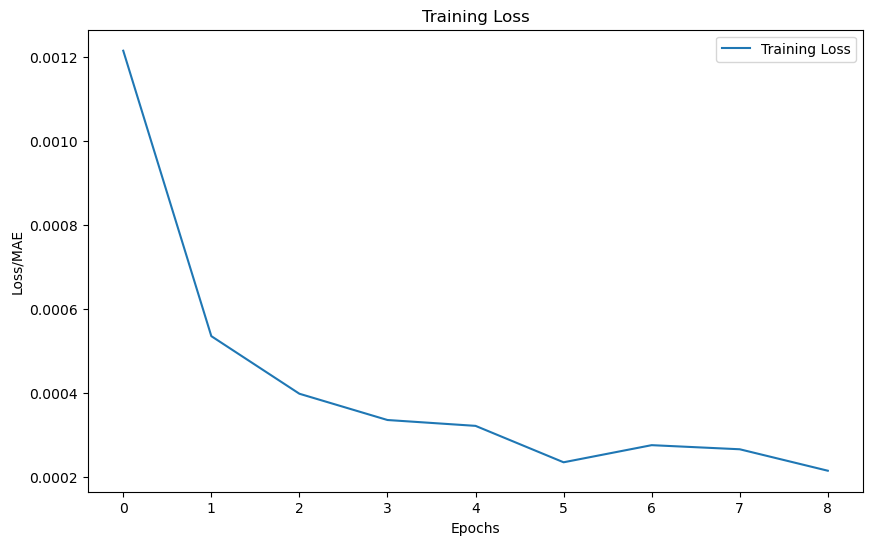

In [25]:
# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss/MAE')
plt.legend()
plt.show()

### Prepare Test Data and Evaluate Model

In [26]:
# This code creates the test dataset by extracting scaled values and generating sequences for prediction. 
# It then reshapes the data, makes predictions using the trained model, and calculates the root mean squared error (RMSE) to evaluate model performance.

test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
RMSE: 3.065431539752003
MAPE: 1.2365841784251197


### Plot Training and Predicted Data

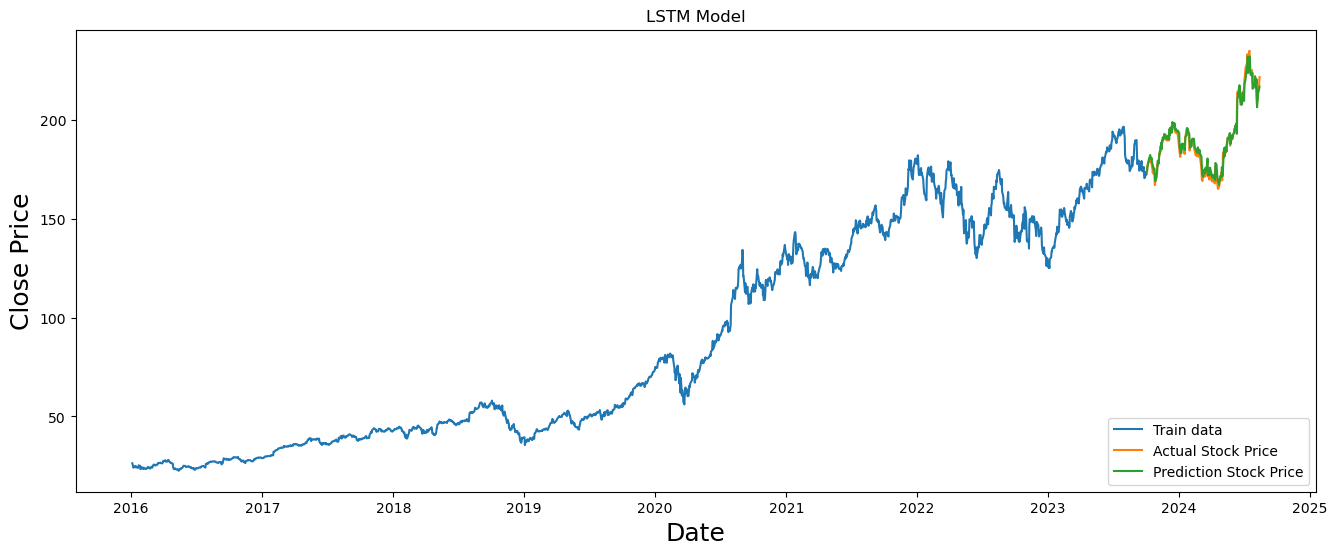

In [27]:
# This code plots the training data, actual test data, and predicted values to visualize the model's performance. 
# It compares the historical closing prices with the predicted prices.

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train data', 'Actual Stock Price', 'Prediction Stock Price'], loc='lower right')
plt.show()


### Display Validation and Predicted Prices

In [28]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-10-04,173.660004,173.761047
2023-10-05,174.910004,175.997375
2023-10-06,177.490005,176.681259
2023-10-09,178.990005,179.427078
2023-10-10,178.389999,180.434219
...,...,...
2024-08-07,209.820007,209.154297
2024-08-08,213.309998,209.995224
2024-08-09,216.240005,213.227417
